<a href="https://colab.research.google.com/github/ariandiniaulia/Machine-Learning/blob/main/Machine_Learning_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
data = pd.read_csv('/content/drive/MyDrive/Final Machine Learning/Mall_Customers.csv')

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#mengganti nama kolom
data.sort_index(inplace=True)
df = data.rename(columns = {"Annual Income (k$)": "AnnualIncome", "Spending Score (1-100)": "SpendingScore"})

In [ ]:
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   AnnualIncome   200 non-null    int64 
 4   SpendingScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Mengecek kolom yang null

In [ ]:
null_col = df.columns[df.isna().sum()>0].to_list() 
null_col

[]

Kita mulai dengan memuat data pelatihan dan validasi di X_train, X_valid, y_train, dan y_valid.

In [ ]:
# Select subset of predictors
cols_to_use = ['Gender', 'Age', 'AnnualIncome']
x = df[cols_to_use]

# Select target
y = df.SpendingScore

In [ ]:
print(x)

     Gender  Age  AnnualIncome
0      Male   19            15
1      Male   21            15
2    Female   20            16
3    Female   23            16
4    Female   31            17
..      ...  ...           ...
195  Female   35           120
196  Female   45           126
197    Male   32           126
198    Male   32           137
199    Male   30           137

[200 rows x 3 columns]


In [ ]:
print(y)

0      39
1      81
2       6
3      77
4      40
       ..
195    79
196    28
197    74
198    18
199    83
Name: SpendingScore, Length: 200, dtype: int64


One Hot Encoding

merepresentasikan data bertipe kategori sebagai vektor biner yang bernilai integer, 0 dan 1, dimana 0 = Female, 1 = Male

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

coltras = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[0])],remainder='passthrough')
X = np.array(coltras.fit_transform(x))
print(X)

[[  0.   1.  19.  15.]
 [  0.   1.  21.  15.]
 [  1.   0.  20.  16.]
 [  1.   0.  23.  16.]
 [  1.   0.  31.  17.]
 [  1.   0.  22.  17.]
 [  1.   0.  35.  18.]
 [  1.   0.  23.  18.]
 [  0.   1.  64.  19.]
 [  1.   0.  30.  19.]
 [  0.   1.  67.  19.]
 [  1.   0.  35.  19.]
 [  1.   0.  58.  20.]
 [  1.   0.  24.  20.]
 [  0.   1.  37.  20.]
 [  0.   1.  22.  20.]
 [  1.   0.  35.  21.]
 [  0.   1.  20.  21.]
 [  0.   1.  52.  23.]
 [  1.   0.  35.  23.]
 [  0.   1.  35.  24.]
 [  0.   1.  25.  24.]
 [  1.   0.  46.  25.]
 [  0.   1.  31.  25.]
 [  1.   0.  54.  28.]
 [  0.   1.  29.  28.]
 [  1.   0.  45.  28.]
 [  0.   1.  35.  28.]
 [  1.   0.  40.  29.]
 [  1.   0.  23.  29.]
 [  0.   1.  60.  30.]
 [  1.   0.  21.  30.]
 [  0.   1.  53.  33.]
 [  0.   1.  18.  33.]
 [  1.   0.  49.  33.]
 [  1.   0.  21.  33.]
 [  1.   0.  42.  34.]
 [  1.   0.  30.  34.]
 [  1.   0.  36.  37.]
 [  1.   0.  20.  37.]
 [  1.   0.  65.  38.]
 [  0.   1.  24.  38.]
 [  0.   1.  48.  39.]
 [  1.   0.

In [ ]:
# Separate data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2, random_state=0)

Data exploration

In [ ]:
corr = df.corr()

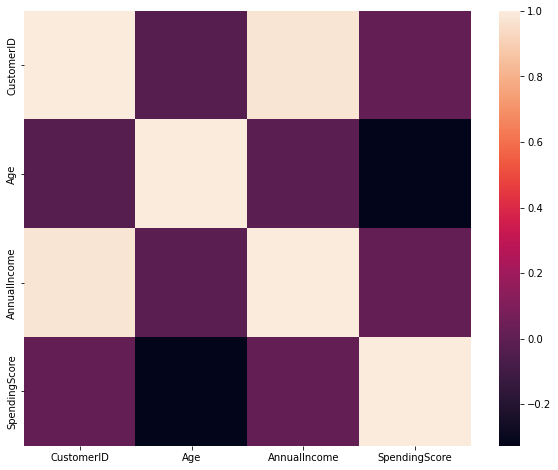

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(corr)

# Multi-Linear Regression

Multi Linear Regression sama seperti linear regression, tetapi dengan lebih dari satu nilai independen, artinya mencoba memprediksi nilai berdasarkan dua variabel atau lebih.

In [ ]:
from sklearn.linear_model import LinearRegression
model_LR = LinearRegression()
model_LR.fit(X_train,y_train)
pred_LR = model_LR.predict(X_valid)
model_LR.score(X_train,y_train)

0.08414545968839726

# XGBoost

XGBoost adalah singkatan dari extreme gradient boosting, yang merupakan implementasi dari gradient boosting dengan beberapa fitur tambahan yang berfokus pada performa dan kecepatan.

In [ ]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
my_model.fit(X_train, y_train)

[07:49:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

prediksi dan mengevaluasi model

In [ ]:
from sklearn.metrics import mean_absolute_error

predictions = my_model.predict(X_valid)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_valid)))

Mean Absolute Error: 12.383893680572509


In [ ]:
model_xgb = XGBRegressor(booster = "gbtree",tree_method="hist" ,n_estimators=512,max_depth = 32)
model_xgb.fit(X_train,y_train)

[07:49:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=32, n_estimators=512, tree_method='hist')

In [ ]:
model_xgb.score(X_train,y_train)

0.9127369733992536

In [ ]:
pred_XGB = model_xgb.predict(X_valid)